In [97]:
#Done on local PC hence GPU could not be used. Not very accurate results becuase of lack of computing power.


import numpy as np 
import pandas as pd 


import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics




In [98]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\Scaler\\Projects\\13. Vegetable CV'

In [99]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'model_ann.png',
 'ninjacart_data',
 'ninjacart_data.zip',
 'Solution.ipynb',
 'Untitled.ipynb']

In [100]:
image_path =  os.getcwd() + '\\ninjacart_data'

In [101]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk(image_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\bhl.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\bhv.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\bn.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\hjx.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\igis.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\in.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\india-4898453__340.jpg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\indian-women-232500__340.jpg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\test\indian market\indianmarket10.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Ve

C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11001 (1).jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11001 (2).jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11001.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11002 (1).jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11002 (2).jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11002.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11003 (1).jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11003.jpeg
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable CV\ninjacart_data\train\potato\potato11003.png
C:\Users\Admin\Documents\Scaler\Projects\13. Vegetable

In [102]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout
from tensorflow.random import set_seed

set_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [103]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'model_ann.png',
 'ninjacart_data',
 'ninjacart_data.zip',
 'Solution.ipynb',
 'Untitled.ipynb']

In [104]:
#List all directories inside the train folder
class_dirs = os.listdir(os.getcwd() + '\\ninjacart_data\\train')

In [105]:
os.getcwd() + '\\ninjacart_data\\train'

'C:\\Users\\Admin\\Documents\\Scaler\\Projects\\13. Vegetable CV\\ninjacart_data\\train'

In [106]:
# dict to store image array(key) for every class(value)
image_dict = {} 

# dict to store count of files(key) for every class(value)
count_dict = {} 

# dict to store the file path for every class(value) in case we need it
path_dict = {}

In [107]:
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'C:\\Users\\Admin\\Documents\\Scaler\\Projects\\13. Vegetable CV\\ninjacart_data\\train\\{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # for each class  put paths of all files coresponding to it
    path_dict[cls] =  file_paths
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

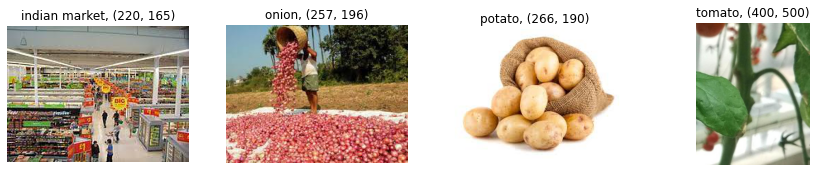

In [108]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()): 
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title 
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [109]:
## Plot the count of each each
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

Count of training samples per class:
            class  count
0  indian market    599
1          onion    849
2         potato    898
3         tomato    789


<Figure size 1080x864 with 0 Axes>

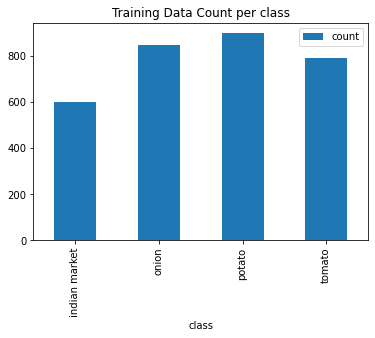

In [110]:
# Bar plot 
plt.figure(figsize=(15,12))
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class") 
plt.show()

In [111]:
# We only have training and test data no validation data provided.
# We could use stratified splitting or k fold cross validation

In [112]:
print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\Admin\\Documents\\Scaler\\Projects\\13. Vegetable CV\\ninjacart_data\\test", shuffle = False,
)



Loading Test Data...
Found 351 files belonging to 4 classes.


In [113]:
print('\nLoading Train Data..')
train_data = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\Admin\\Documents\\Scaler\\Projects\\13. Vegetable CV\\ninjacart_data\\train", shuffle = False,
)

train_data, val_data = tf.keras.utils.split_dataset(train_data, left_size=0.8)


# Does not give compelte length 
#dataset_length = [i for i,_ in enumerate(train_data)][-1] + 1
#print(dataset_length)


Loading Train Data..
Found 3135 files belonging to 4 classes.


In [114]:
print(int(train_data.cardinality()))
print(int(val_data.cardinality()))

79
20


In [115]:
height, width = 224, 224

# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

In [116]:
# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))

In [117]:
#Training Simple Neural Network (MLP)

#Running a ANN for the given images


In [118]:
num_classes = 4
hidden_size_1 = 1024
hidden_size_2 = 256

In [119]:
model_ann = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)



In [120]:
model_ann.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 1024)              154141696 
                                                                 
 dense_13 (Dense)            (None, 256)               262400    
                                                                 
 dense_14 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 154,405,124
Trainable params: 154,405,124
Non-trainable params: 0
_________________________________________________________________


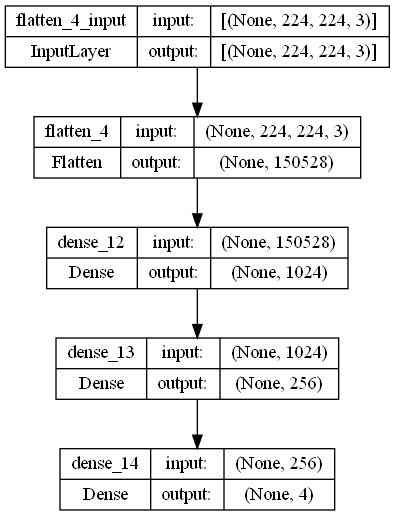

In [121]:
tf.keras.utils.plot_model(model_ann, to_file="model_ann.png", show_shapes=True)

In [122]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

In [124]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)


In [127]:
epochs = 10
model_fit = model_ann.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
79/79 [==============================] - 201s 3s/step - loss: 0.8245 - accuracy: 0.7293 - val_loss: 1.0770 - val_accuracy: 0.6619
Epoch 2/10
79/79 [==============================] - 196s 2s/step - loss: 0.7614 - accuracy: 0.7528 - val_loss: 1.3700 - val_accuracy: 0.5726
Epoch 3/10
79/79 [==============================] - 194s 2s/step - loss: 0.5918 - accuracy: 0.7883 - val_loss: 1.1452 - val_accuracy: 0.6348
Epoch 4/10
79/79 [==============================] - 196s 2s/step - loss: 0.6842 - accuracy: 0.7528 - val_loss: 1.0506 - val_accuracy: 0.6715
Epoch 5/10
79/79 [==============================] - 196s 2s/step - loss: 0.6542 - accuracy: 0.7640 - val_loss: 1.2485 - val_accuracy: 0.5885
Epoch 6/10
79/79 [==============================] - 195s 2s/step - loss: 0.5496 - accuracy: 0.8034 - val_loss: 1.0313 - val_accuracy: 0.6683
Epoch 7/10
79/79 [==============================] - 189s 2s/step - loss: 0.4860 - accuracy: 0.8230 - val_loss: 1.0964 - val_accuracy: 0.6571
Epoch 8/10
79

In [221]:
#Helper functions

def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])
    
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch 
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()
    
def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')
    
def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()
    
    

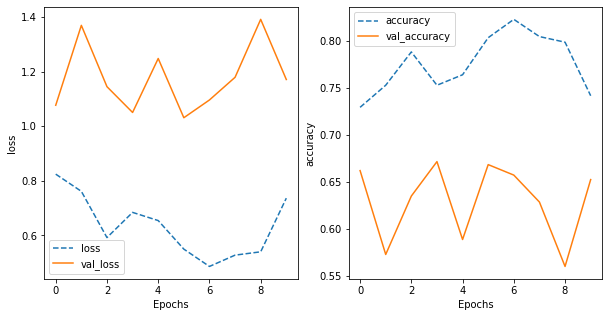

In [129]:
training_plot(['loss', 'accuracy'], model_fit)

In [130]:
testAccuracy(model_ann)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 3s 67ms/step

Test Accuracy: 25.64%



11/11 [==============================] - 1s 63ms/step


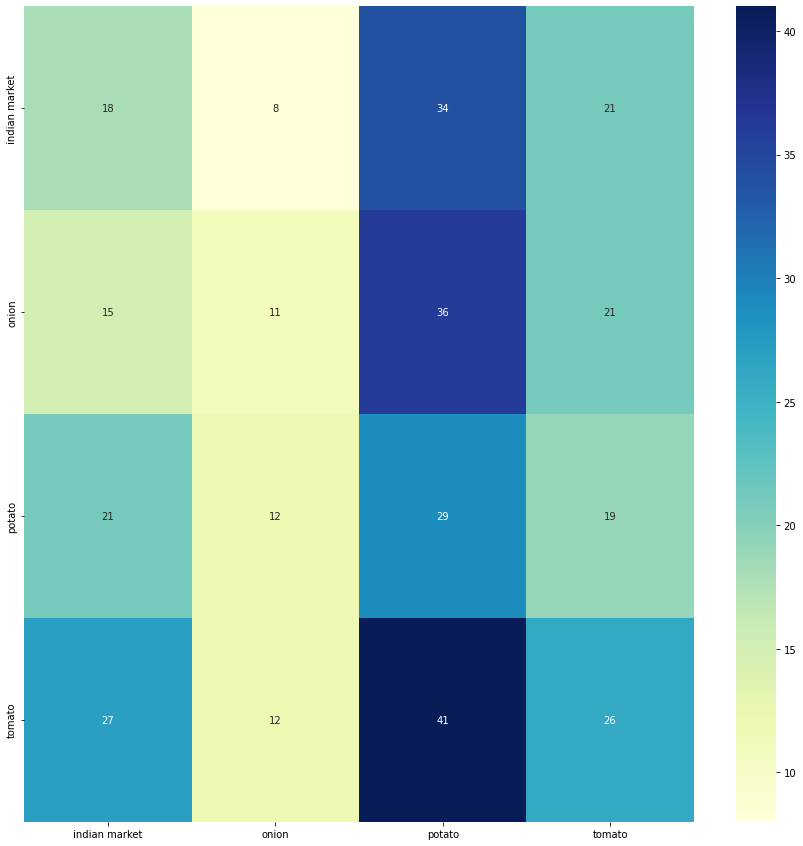

In [131]:
ConfusionMatrix(model_ann, test_ds, test_data.class_names)

In [132]:
#Training a simple CNN 

In [133]:
model_base_cnn = keras.Sequential(
    name="model_base_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [134]:
model_base_cnn.summary()

Model: "model_base_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 flatten_5 (Flatten)         (None, 200704)            0         
                                                                 
 dense_15 (Dense)            (None, 256)               51380480  
                                                                 
 dense_16 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 51,381,956
Trainable params: 51,381,956
Non-trainable params: 0
________________________________________

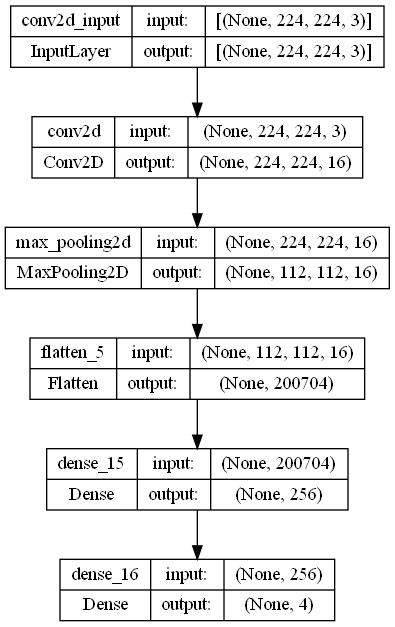

In [135]:
tf.keras.utils.plot_model(model_base_cnn, to_file="model_cnn.png", show_shapes=True)

In [136]:
model_base_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
epochs = 10
model_base_cnn_fit = model_base_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
79/79 [==============================] - 85s 1s/step - loss: 0.3809 - accuracy: 0.8688 - val_loss: 0.7516 - val_accuracy: 0.7432
Epoch 2/10
79/79 [==============================] - 78s 990ms/step - loss: 0.1931 - accuracy: 0.9462 - val_loss: 0.7452 - val_accuracy: 0.7799
Epoch 3/10
79/79 [==============================] - 74s 943ms/step - loss: 0.1035 - accuracy: 0.9697 - val_loss: 0.6568 - val_accuracy: 0.8118
Epoch 4/10
79/79 [==============================] - 72s 918ms/step - loss: 0.0538 - accuracy: 0.9864 - val_loss: 0.7522 - val_accuracy: 0.7799
Epoch 5/10
79/79 [==============================] - 73s 927ms/step - loss: 0.0345 - accuracy: 0.9936 - val_loss: 0.9444 - val_accuracy: 0.7719
Epoch 6/10
79/79 [==============================] - 74s 941ms/step - loss: 0.0422 - accuracy: 0.9888 - val_loss: 0.8185 - val_accuracy: 0.8038
Epoch 7/10
79/79 [==============================] - 76s 957ms/step - loss: 0.0307 - accuracy: 0.9940 - val_loss: 0.8550 - val_accuracy: 0.8038
Ep

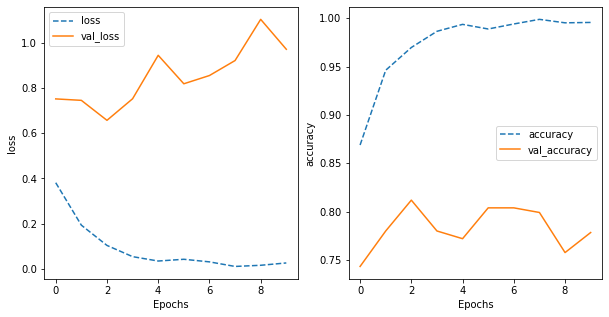

In [139]:
training_plot(['loss', 'accuracy'], model_base_cnn_fit)

In [140]:
testAccuracy(model_base_cnn)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 1s 90ms/step

Test Accuracy: 28.49%



11/11 [==============================] - 1s 89ms/step


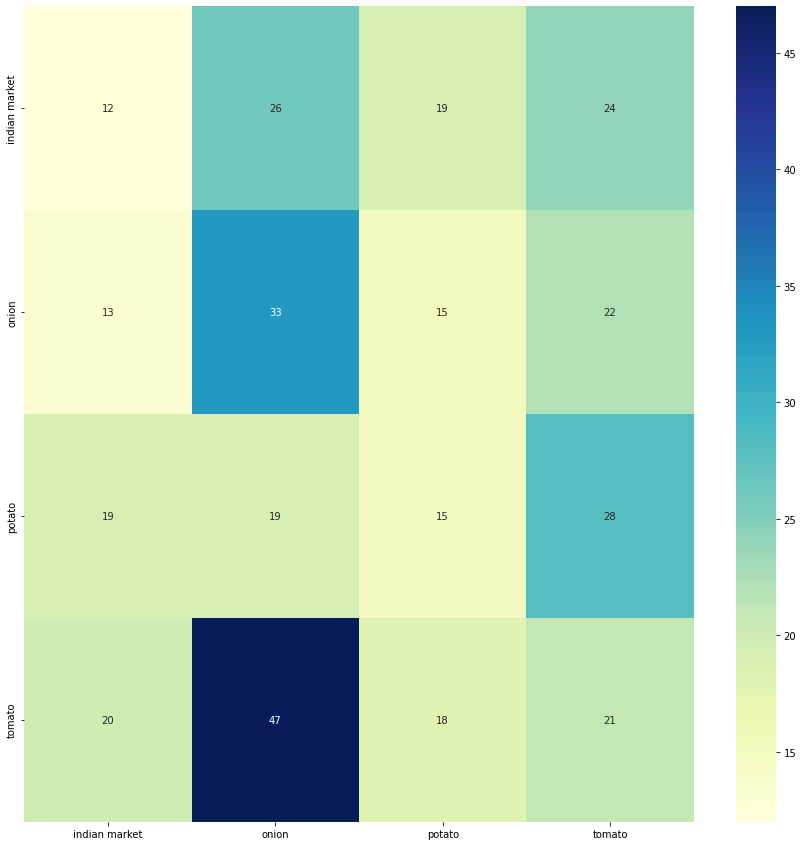

In [141]:
ConfusionMatrix(model_base_cnn, test_ds, test_data.class_names)

In [151]:
#Creating Deeper Model (Adding more convolution and max pooling layers)

In [152]:
model_impv_cnn = keras.Sequential(
    name="model_impv_cnn_2",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        
        layers.GlobalAveragePooling2D(),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [157]:
model_impv_cnn.summary()

Model: "model_impv_cnn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                              

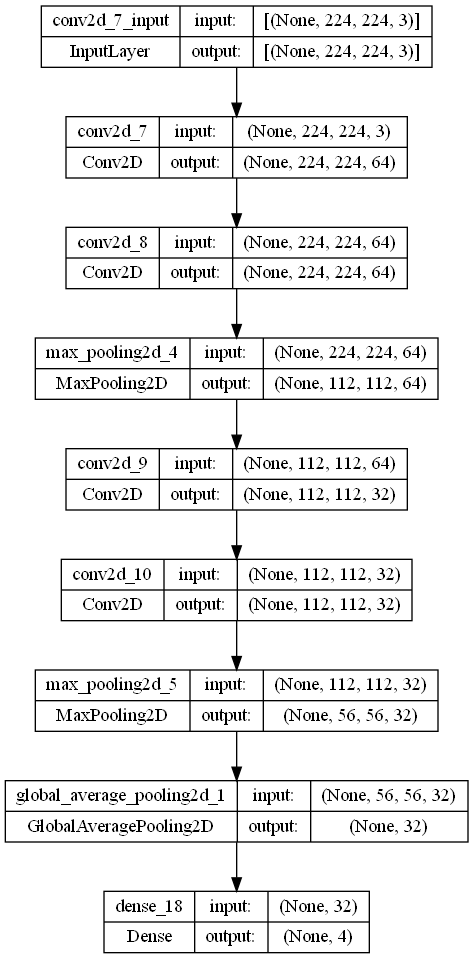

In [158]:
tf.keras.utils.plot_model(model_impv_cnn, to_file="model_cnn_2.png", show_shapes=True)

In [159]:
model_impv_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [161]:
epochs = 5
model_fit = model_impv_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
79/79 [==============================] - 360s 5s/step - loss: 0.9629 - accuracy: 0.5985 - val_loss: 0.8478 - val_accuracy: 0.6380
Epoch 2/5
79/79 [==============================] - 351s 4s/step - loss: 0.7127 - accuracy: 0.7309 - val_loss: 0.6970 - val_accuracy: 0.7352
Epoch 3/5
79/79 [==============================] - 372s 5s/step - loss: 0.6776 - accuracy: 0.7404 - val_loss: 0.6966 - val_accuracy: 0.7384
Epoch 4/5
79/79 [==============================] - 411s 5s/step - loss: 0.6032 - accuracy: 0.7632 - val_loss: 0.6204 - val_accuracy: 0.7544
Epoch 5/5
79/79 [==============================] - 389s 5s/step - loss: 0.5447 - accuracy: 0.7895 - val_loss: 0.5671 - val_accuracy: 0.7703


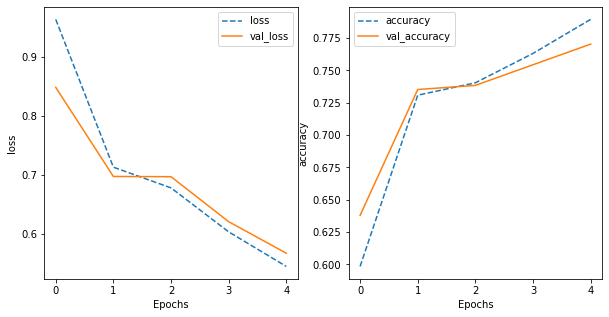

In [162]:
training_plot(['loss', 'accuracy'], model_fit)

In [163]:
testAccuracy(model_impv_cnn)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 7s 575ms/step

Test Accuracy: 27.35%



11/11 [==============================] - 7s 577ms/step


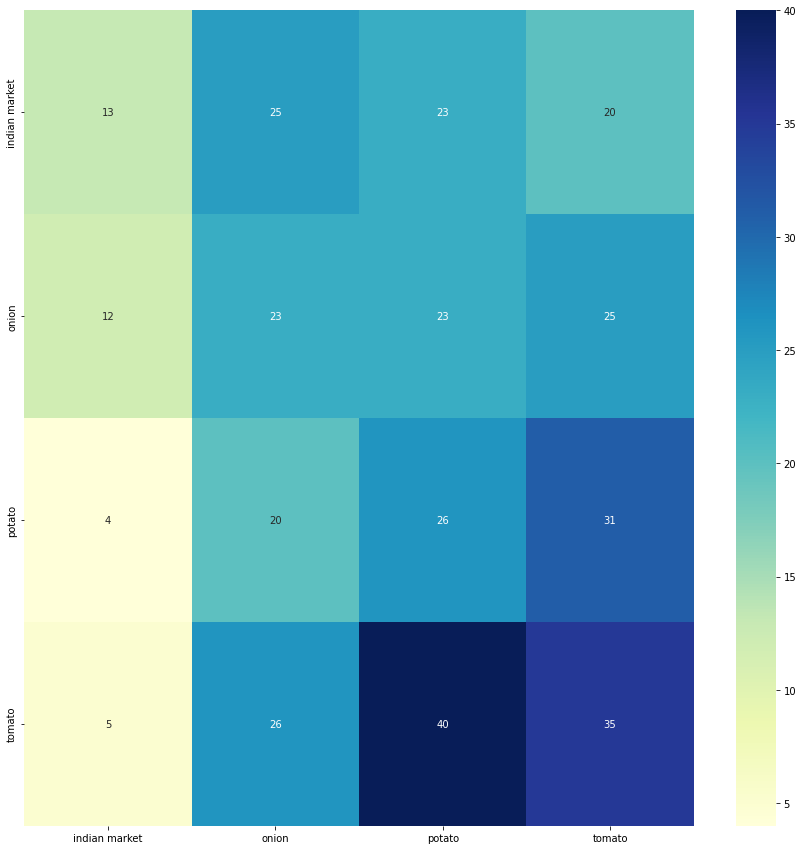

In [164]:
ConfusionMatrix(model_impv_cnn, test_ds, test_data.class_names)

In [165]:
#Reducing the overfitting of the model using BatchNormalization and Dropout layers. Adding Global Average Pooling 
#instead of Flatten layer.

In [166]:
model_bndr_cnn = keras.Sequential(
    name="model_cnn_4",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.25),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [167]:
model_bndr_cnn.summary()

Model: "model_cnn_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 32)      

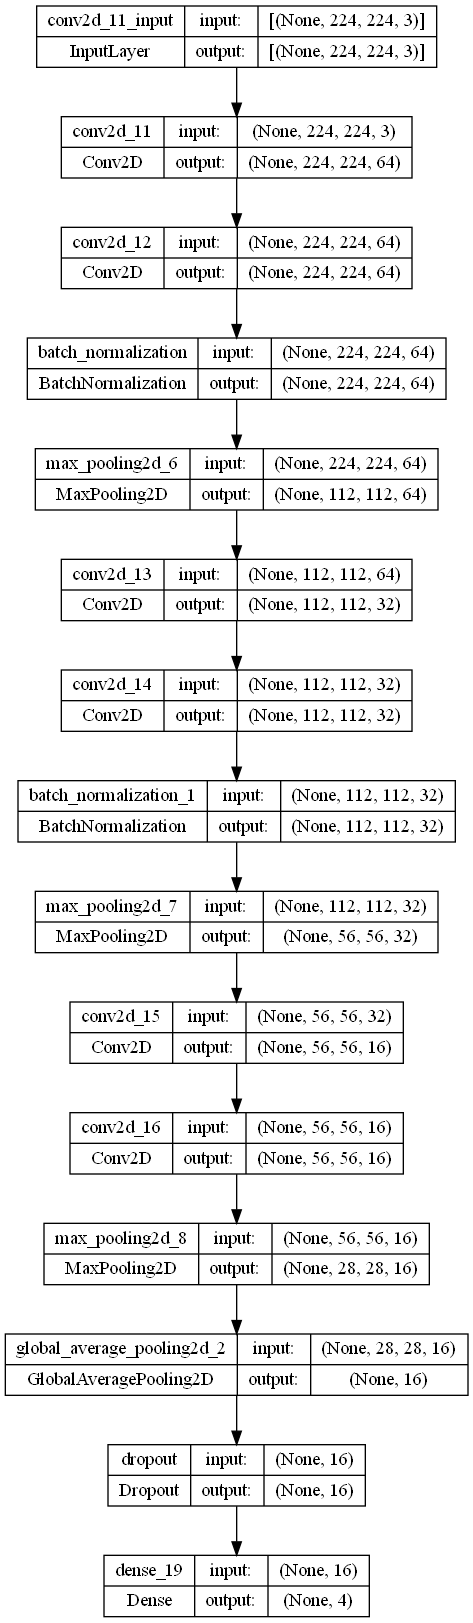

In [168]:
tf.keras.utils.plot_model(model_bndr_cnn, to_file="model_cnn_3.png", show_shapes=True)

In [169]:
model_bndr_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [172]:
epochs = 1
model_bndr_cnn_fit = model_bndr_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint_callback,early_stopping_callback])



79/79 [==============================] - 441s 6s/step - loss: 0.9713 - accuracy: 0.5742 - val_loss: 1.1948 - val_accuracy: 0.5486


In [173]:
#Taking too long to train on my own PC !

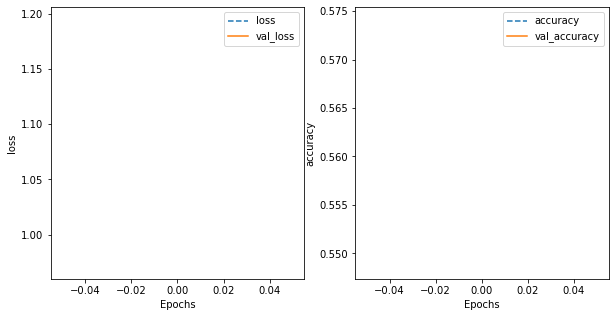

In [174]:
training_plot(['loss', 'accuracy'], model_bndr_cnn_fit)

In [175]:
testAccuracy(model_bndr_cnn)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 10s 811ms/step

Test Accuracy: 25.64%



11/11 [==============================] - 9s 750ms/step


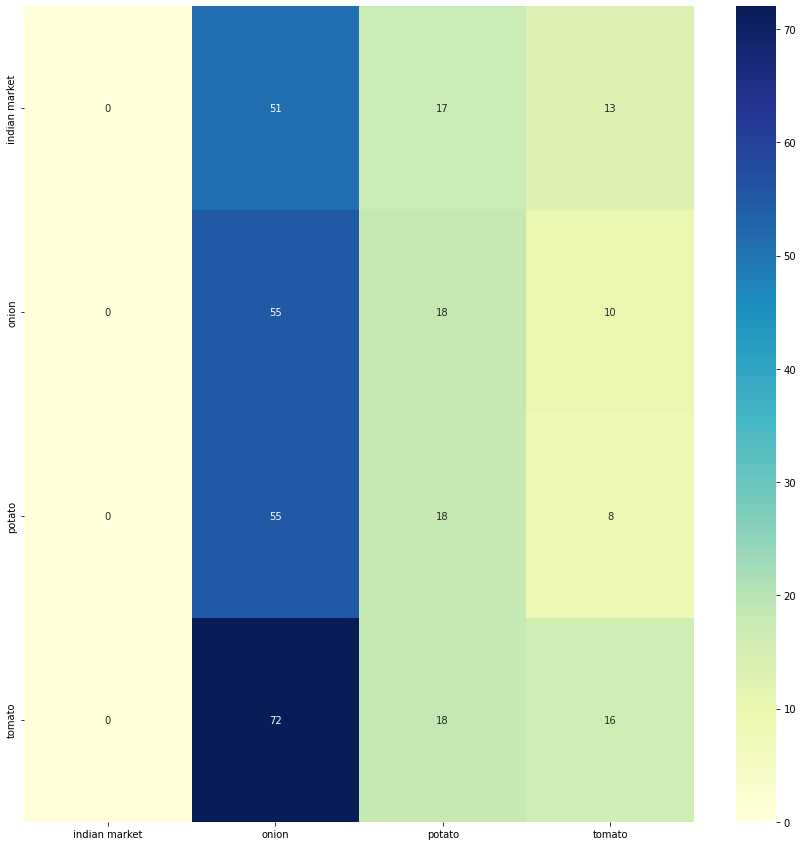

In [176]:
ConfusionMatrix(model_bndr_cnn, test_ds, test_data.class_names)

In [177]:
#Transfer Learning

In [182]:
#VGG16

In [183]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [184]:
vgg16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_6   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_26 (Dense)            (None, 64)                32832     
                                                                 
 dense_27 (Dense)            (None, 4)                 260       
                                                                 
Total params: 14,747,780
Trainable params: 33,092
Non-trainable params: 14,714,688
_________________________________________________________________


In [185]:
vgg16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [187]:
history_vgg16 = vgg16_model.fit(train_ds, epochs=20, validation_data=val_ds,callbacks=[checkpoint_callback,early_stopping_callback])



Epoch 1/20
79/79 [==============================] - 226s 3s/step - loss: 0.7224 - accuracy: 0.7811 - val_loss: 0.5494 - val_accuracy: 0.7783
Epoch 2/20
79/79 [==============================] - 267s 3s/step - loss: 0.4106 - accuracy: 0.8593 - val_loss: 0.4113 - val_accuracy: 0.8469
Epoch 3/20
79/79 [==============================] - 245s 3s/step - loss: 0.3199 - accuracy: 0.8927 - val_loss: 0.3700 - val_accuracy: 0.8644
Epoch 4/20
79/79 [==============================] - 242s 3s/step - loss: 0.2845 - accuracy: 0.9043 - val_loss: 0.3516 - val_accuracy: 0.8692
Epoch 5/20
79/79 [==============================] - 244s 3s/step - loss: 0.2489 - accuracy: 0.9175 - val_loss: 0.3297 - val_accuracy: 0.8804
Epoch 6/20
79/79 [==============================] - 252s 3s/step - loss: 0.2224 - accuracy: 0.9290 - val_loss: 0.3226 - val_accuracy: 0.8708
Epoch 7/20
79/79 [==============================] - 232s 3s/step - loss: 0.2088 - accuracy: 0.9274 - val_loss: 0.3196 - val_accuracy: 0.8724
Epoch 8/20
79

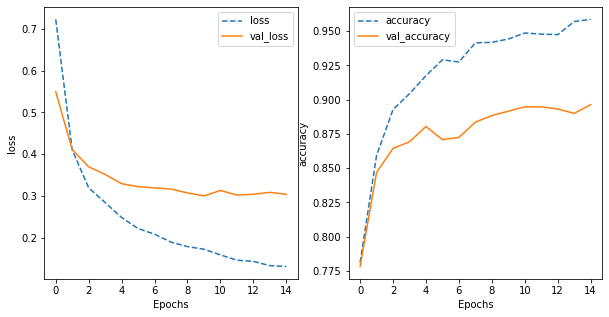

In [188]:
training_plot(['loss', 'accuracy'], history_vgg16)

In [189]:
testAccuracy(vgg16_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 27s 2s/step

Test Accuracy: 24.50%



11/11 [==============================] - 26s 2s/step


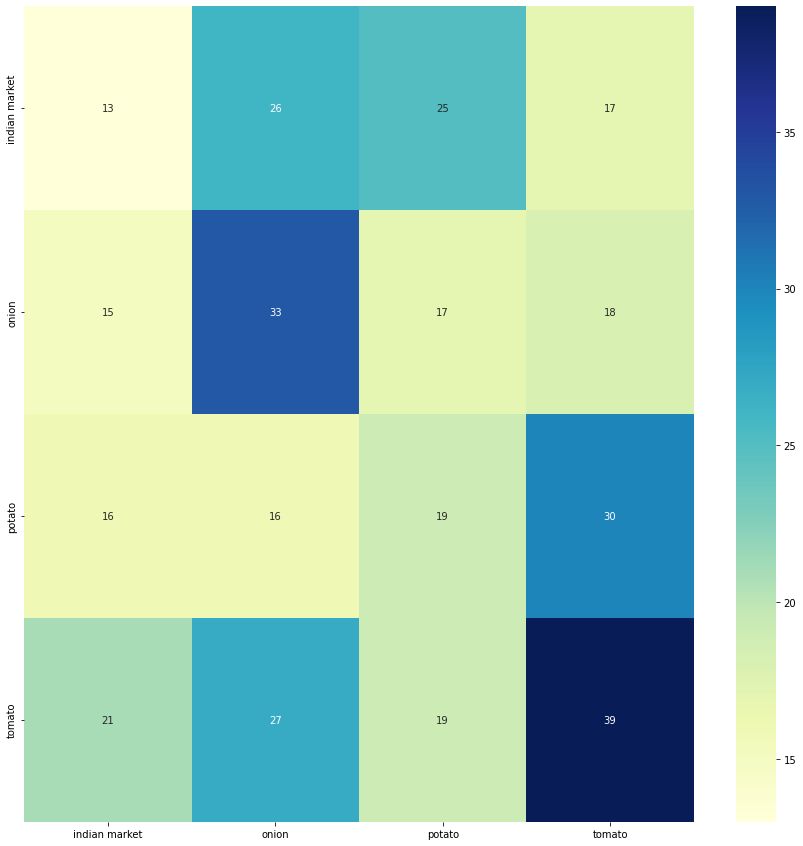

In [190]:
ConfusionMatrix(vgg16_model, test_ds, test_data.class_names)

In [191]:
#Resnet

In [194]:
pretrained_resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet',
                         include_top=False,
                         input_tensor = (tf.keras.layers.Input(shape=(height,width,3)))
                         )
pretrained_resnet_model.trainable=False
resnet_model = tf.keras.Sequential([
    pretrained_resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [195]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_30 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


In [196]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [197]:
history_resnet = resnet_model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/20
79/79 [==============================] - 136s 2s/step - loss: 0.3924 - accuracy: 0.8457 - val_loss: 0.2081 - val_accuracy: 0.9234
Epoch 2/20
79/79 [==============================] - 132s 2s/step - loss: 0.1225 - accuracy: 0.9601 - val_loss: 0.1732 - val_accuracy: 0.9426
Epoch 3/20
79/79 [==============================] - 146s 2s/step - loss: 0.0849 - accuracy: 0.9753 - val_loss: 0.1689 - val_accuracy: 0.9426
Epoch 4/20
79/79 [==============================] - 138s 2s/step - loss: 0.0636 - accuracy: 0.9821 - val_loss: 0.1635 - val_accuracy: 0.9490
Epoch 5/20
79/79 [==============================] - 136s 2s/step - loss: 0.0505 - accuracy: 0.9896 - val_loss: 0.1707 - val_accuracy: 0.9442
Epoch 6/20
79/79 [==============================] - 138s 2s/step - loss: 0.0415 - accuracy: 0.9900 - val_loss: 0.1646 - val_accuracy: 0.9490
Epoch 7/20
79/79 [==============================] - 134s 2s/step - loss: 0.0337 - accuracy: 0.9932 - val_loss: 0.1655 - val_accuracy: 0.9490
Epoch 8/20
79

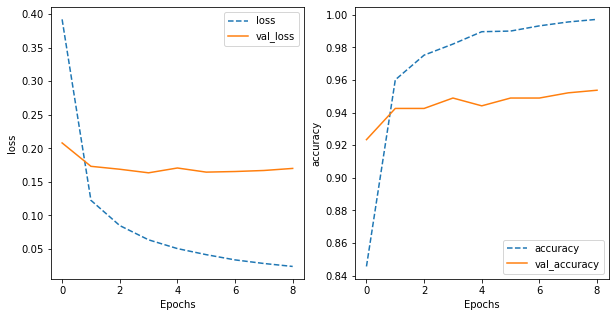

In [201]:
training_plot(['loss', 'accuracy'], history_resnet)

In [202]:
testAccuracy(resnet_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 16s 1s/step

Test Accuracy: 27.92%



11/11 [==============================] - 15s 1s/step


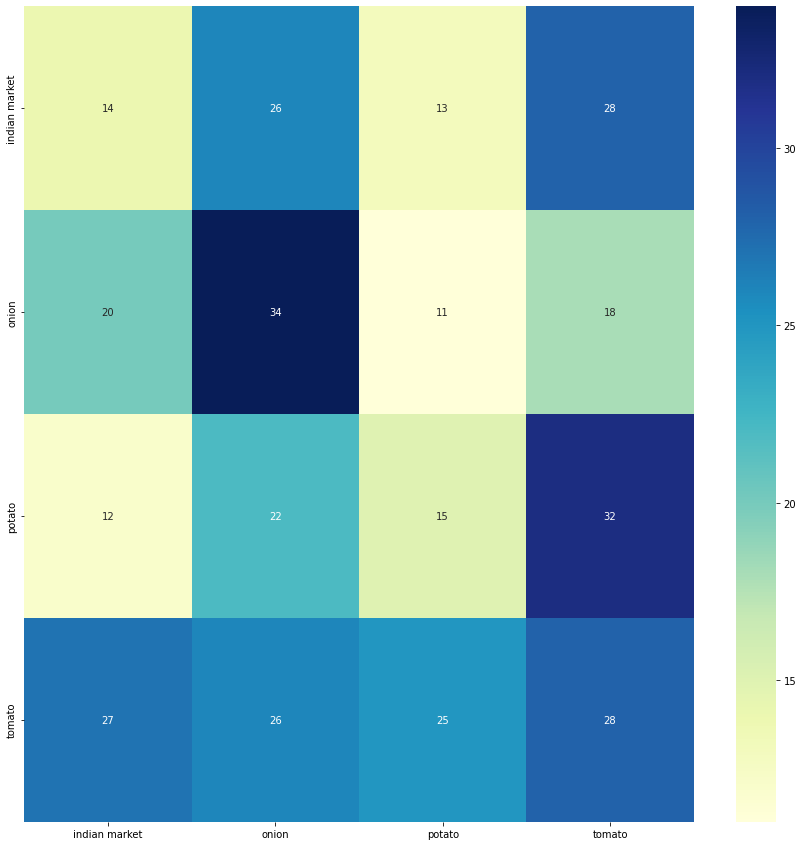

In [203]:
ConfusionMatrix(resnet_model, test_ds, test_data.class_names)

In [204]:
#MobileNet

In [205]:
pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

9406464/9406464 [==============================] - 3s 0us/step


In [206]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [207]:
mobilenet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_31 (Dense)            (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [208]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
79/79 [==============================] - 61s 733ms/step - loss: 0.4066 - accuracy: 0.8521 - val_loss: 0.1953 - val_accuracy: 0.9314
Epoch 2/10
79/79 [==============================] - 70s 890ms/step - loss: 0.1171 - accuracy: 0.9653 - val_loss: 0.1447 - val_accuracy: 0.9522
Epoch 3/10
79/79 [==============================] - 61s 780ms/step - loss: 0.0784 - accuracy: 0.9797 - val_loss: 0.1280 - val_accuracy: 0.9585
Epoch 4/10
79/79 [==============================] - 59s 747ms/step - loss: 0.0572 - accuracy: 0.9860 - val_loss: 0.1180 - val_accuracy: 0.9585
Epoch 5/10
79/79 [==============================] - 61s 775ms/step - loss: 0.0444 - accuracy: 0.9908 - val_loss: 0.1066 - val_accuracy: 0.9681
Epoch 6/10
79/79 [==============================] - 62s 787ms/step - loss: 0.0357 - accuracy: 0.9960 - val_loss: 0.1019 - val_accuracy: 0.9729
Epoch 7/10
79/79 [==============================] - 62s 790ms/step - loss: 0.0296 - accuracy: 0.9976 - val_loss: 0.0973 - val_accuracy: 0.9729

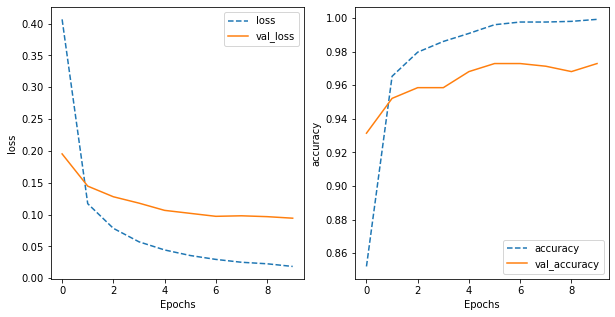

In [209]:
training_plot(['loss', 'accuracy'], history_mobilenet)

In [210]:
testAccuracy(mobilenet_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 8s 637ms/step

Test Accuracy: 25.64%



11/11 [==============================] - 7s 583ms/step


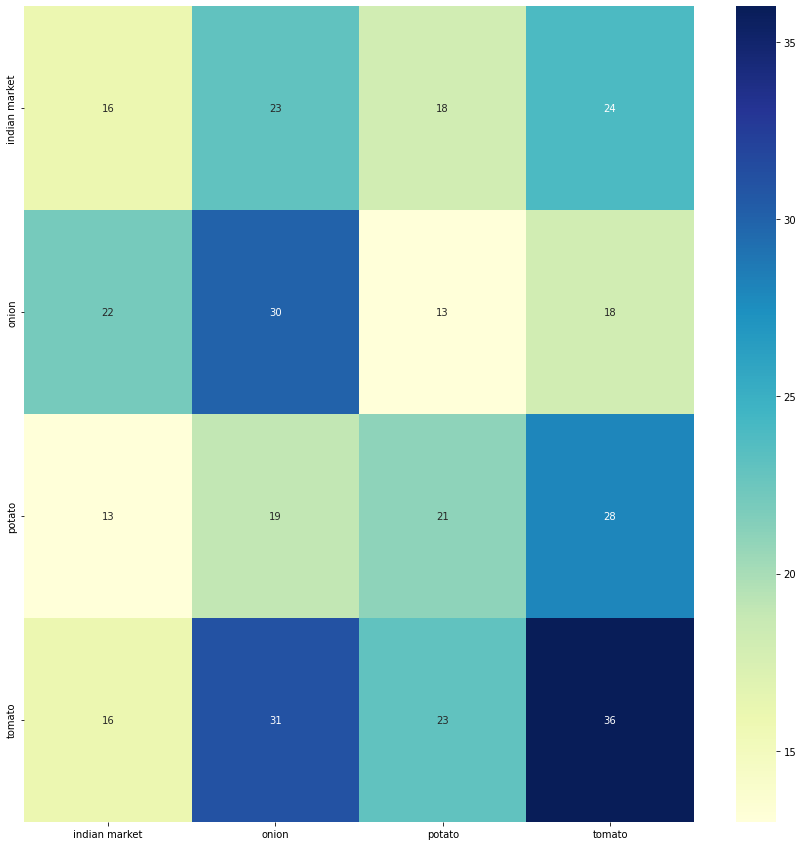

In [211]:
ConfusionMatrix(mobilenet_model, test_ds, test_data.class_names)

In [212]:
#MobileNet with more dense layers added for better prediction

pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [213]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [214]:
mobilenet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_11  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_32 (Dense)            (None, 128)               163968    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 4)                

In [215]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
79/79 [==============================] - 64s 774ms/step - loss: 0.2576 - accuracy: 0.9059 - val_loss: 0.1558 - val_accuracy: 0.9394
Epoch 2/10
79/79 [==============================] - 62s 783ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.1643 - val_accuracy: 0.9394
Epoch 3/10
79/79 [==============================] - 62s 787ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.1107 - val_accuracy: 0.9537
Epoch 4/10
79/79 [==============================] - 64s 817ms/step - loss: 0.0124 - accuracy: 0.9984 - val_loss: 0.0944 - val_accuracy: 0.9713
Epoch 5/10
79/79 [==============================] - 64s 819ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.1014 - val_accuracy: 0.9697
Epoch 6/10
79/79 [==============================] - 64s 817ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.1009 - val_accuracy: 0.9729
Epoch 7/10
79/79 [==============================] - 67s 850ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9697

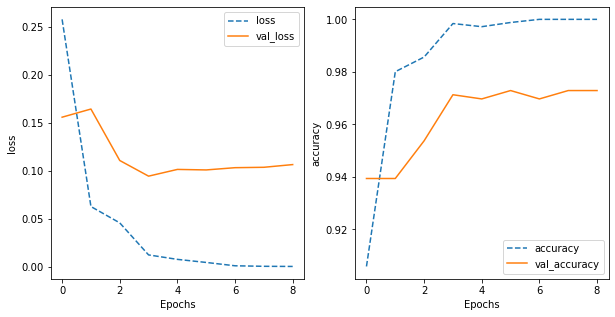

In [216]:
training_plot(['loss', 'accuracy'], history_mobilenet)

In [217]:
testAccuracy(mobilenet_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 8s 630ms/step

Test Accuracy: 23.36%



11/11 [==============================] - 3s 70ms/step


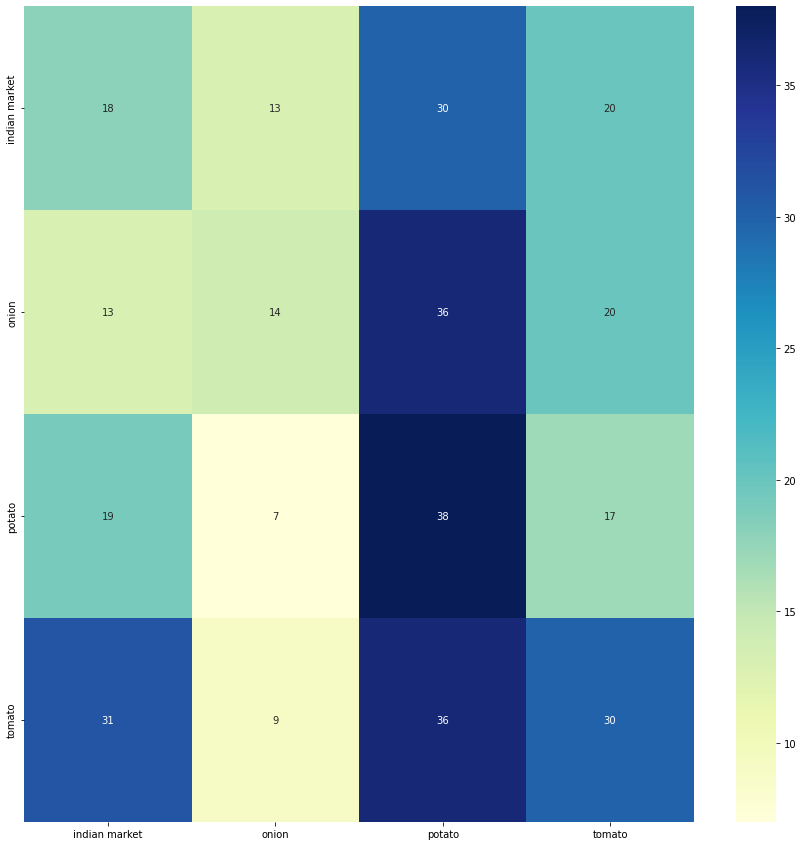

In [218]:
ConfusionMatrix(model_ann, test_ds, test_data.class_names)

11/11 [==============================] - 16s 1s/step


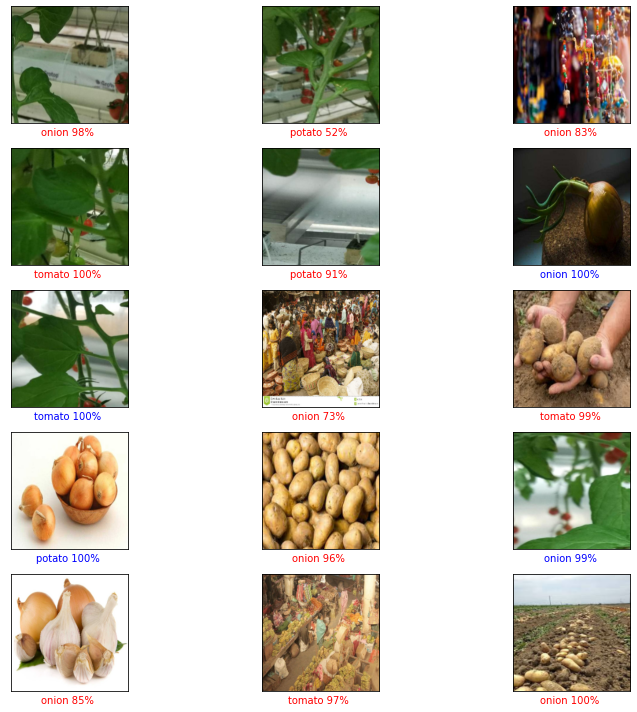

In [219]:
predictions(resnet_model)

11/11 [==============================] - 7s 573ms/step


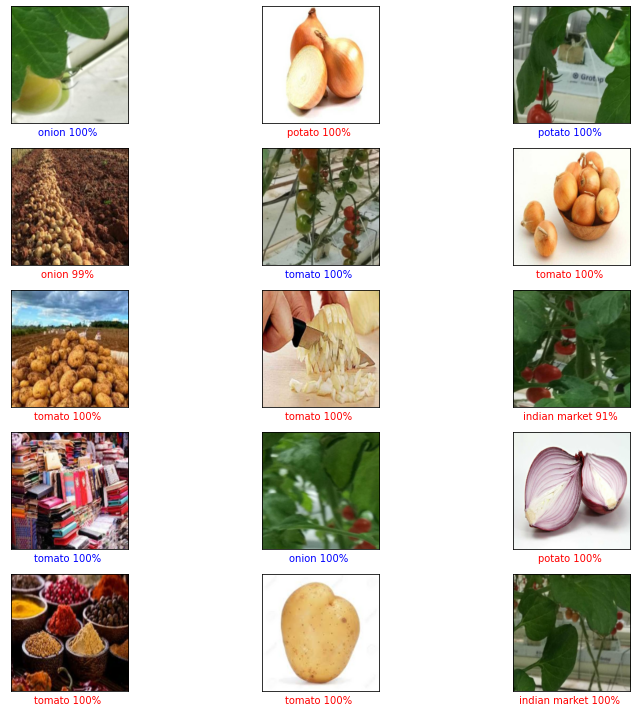

In [223]:
predictions(mobilenet_model)

Transfer leanring is the best approach when it comes to trainign time otherwise a lot of time is spent in training.

1) Resnet and Mobielnet give the best performance.
2) The quality of training data provided is not very good hence even Resnet and Mobilenet do not result in high accuracy 
   even after adding dense layers post the pretrained part of the model. 